### Klasyfikator

Klasyfikacja działa podobnie. Wykorzystamy tym razem syntetyczny zestaw danych (jest to dobre rozwiązanie do testowania modeli w szybki sposób bez specyficznego zastosowania)

In [ ]:
import xgboost as xgb
import numpy as np
import time
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
datasets.make_classification?

Służy do tego `make_classification`

In [ ]:
x, y = datasets.make_classification(
    n_samples=2500, n_features=20, n_informative=3, n_redundant=2
)

In [ ]:
x

array([[-0.13603441, -0.21856478,  2.20563103, ...,  0.53048089,
        -0.74312552,  0.86988402],
       [-0.41658771,  0.55468886, -0.91575992, ..., -1.17347066,
         1.59434286, -0.88306385],
       [ 0.24185855, -1.66734782,  1.0586381 , ...,  1.34993466,
        -0.03745727, -0.49522505],
       ...,
       [ 0.12861333,  0.40951017,  1.19649852, ..., -0.05743585,
         1.02914279,  0.31508869],
       [-0.46821162,  1.43461624,  0.66952973, ..., -0.84538863,
         0.31542978, -0.55460366],
       [ 1.00592244,  1.32107514, -1.33336085, ...,  0.127428  ,
         0.35714177, -0.0681117 ]])

In [ ]:
from collections import Counter

Counter(y)

Counter({0: 1248, 1: 1252})

In [ ]:
np.sum(y), len(y)

(1252, 2500)

Standardowy podział na dane treningowe oraz testowe

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2000, 20)
x_test shape:  (500, 20)
y_train shape:  (2000,)
y_test shape:  (500,)


Stworzenie prostego klasyfikatora xgboost - konwencja nazewnictwa jest podobna do pozostałych modeli sklearnowych

In [ ]:
xgb_cl = xgb.XGBClassifier(n_estimators=100, max_depth=3, use_label_encoder=False, eval_metric='error')

In [ ]:
?xgb.XGBClassifier

Trening

In [ ]:
start = time.time()

xgb_cl.fit(x_train, y_train)

end = time.time()
print("time: ",end - start)

time:  2.352653980255127


Policzenie skuteczności

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = xgb_cl.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("acc: ", acc)

acc:  0.946


In [ ]:
xgb_cl.score?

In [ ]:
probas = xgb_cl.predict_proba(x_test)

In [ ]:
positive_proba = probas[:, 1]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       248
           1       0.95      0.94      0.95       252

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, positive_proba) # AUROC Area Under Receiver Operating Charactericstic Curve

0.9832149257552483

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1024px-Roc_curve.svg.png)

In [ ]:
from sklearn.metrics import roc_curve

roc_curve?

Text(0, 0.5, 'True positive rate')

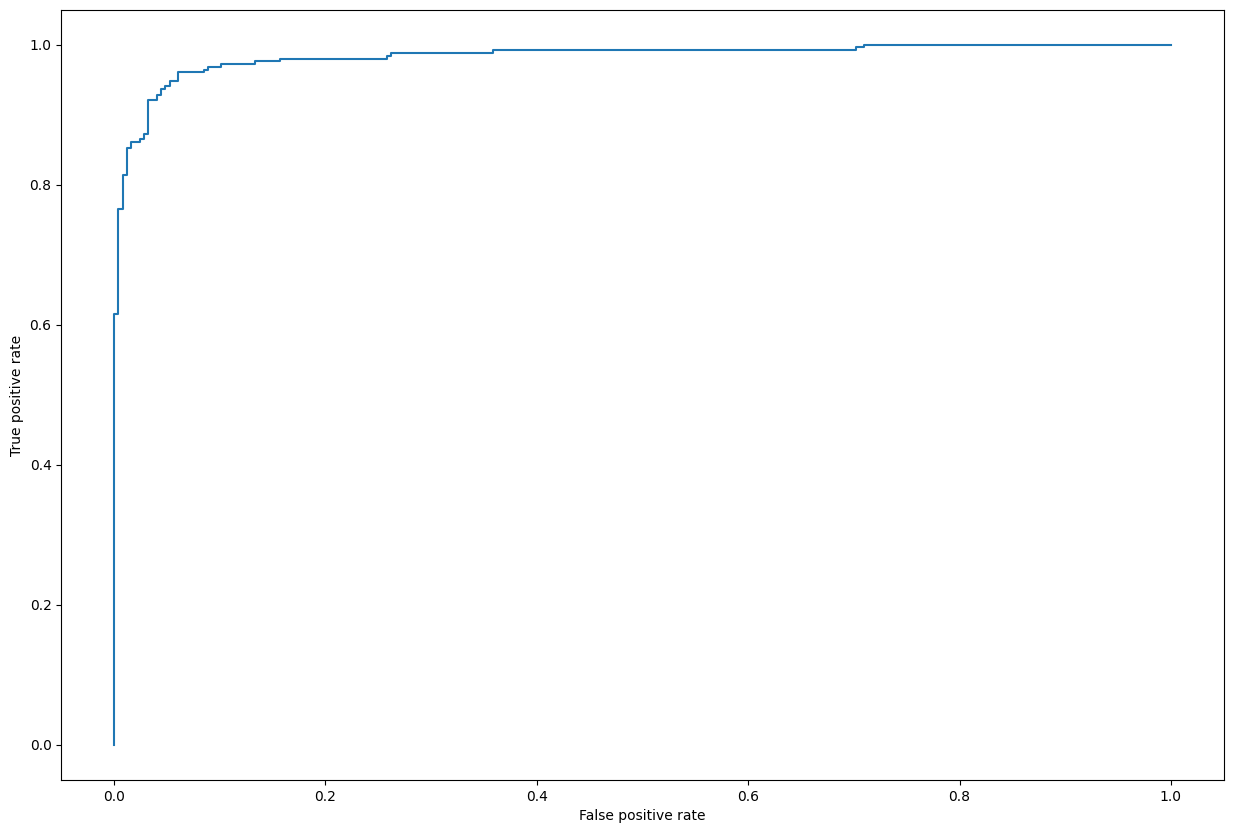

In [ ]:
# Receiver operating characteristic

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, positive_proba)

plt.figure(figsize=(15, 10))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

Text(0, 0.5, 'Precision')

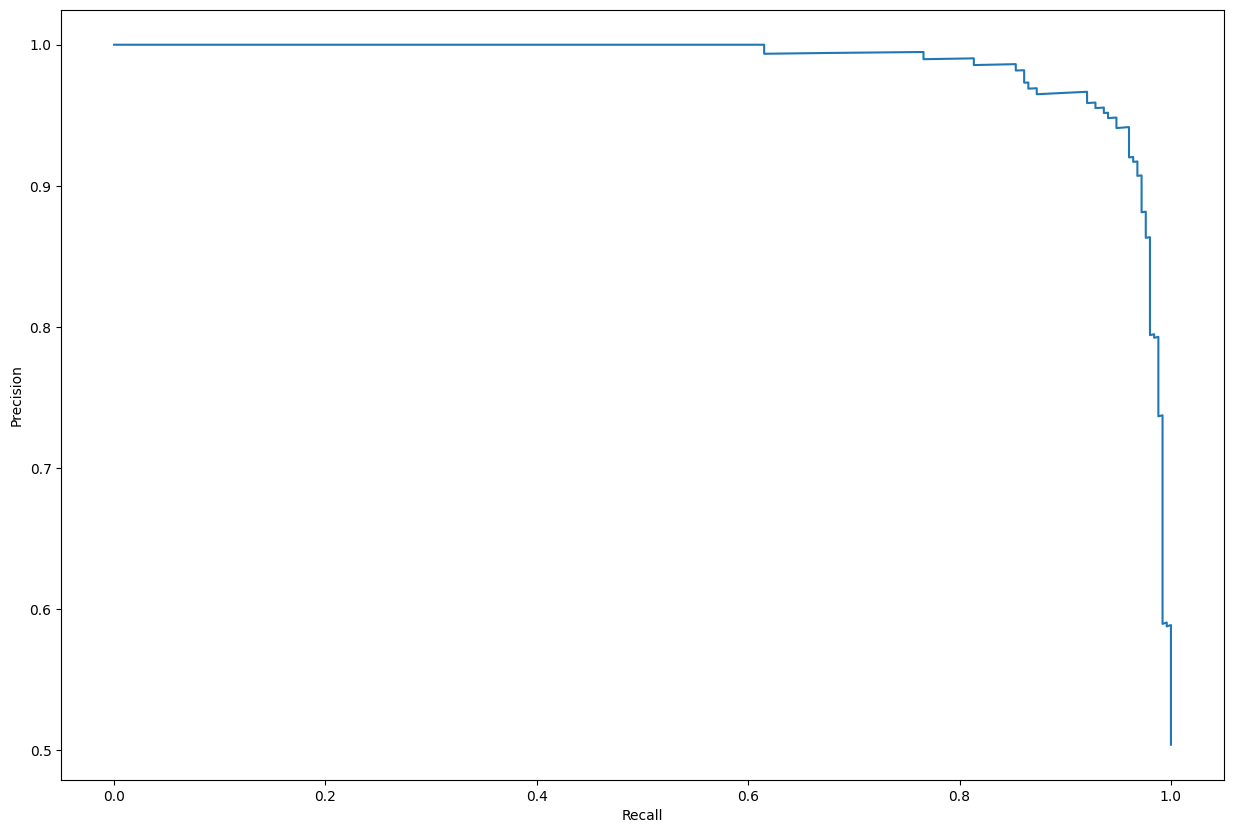

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, positive_proba)

plt.figure(figsize=(15, 10))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

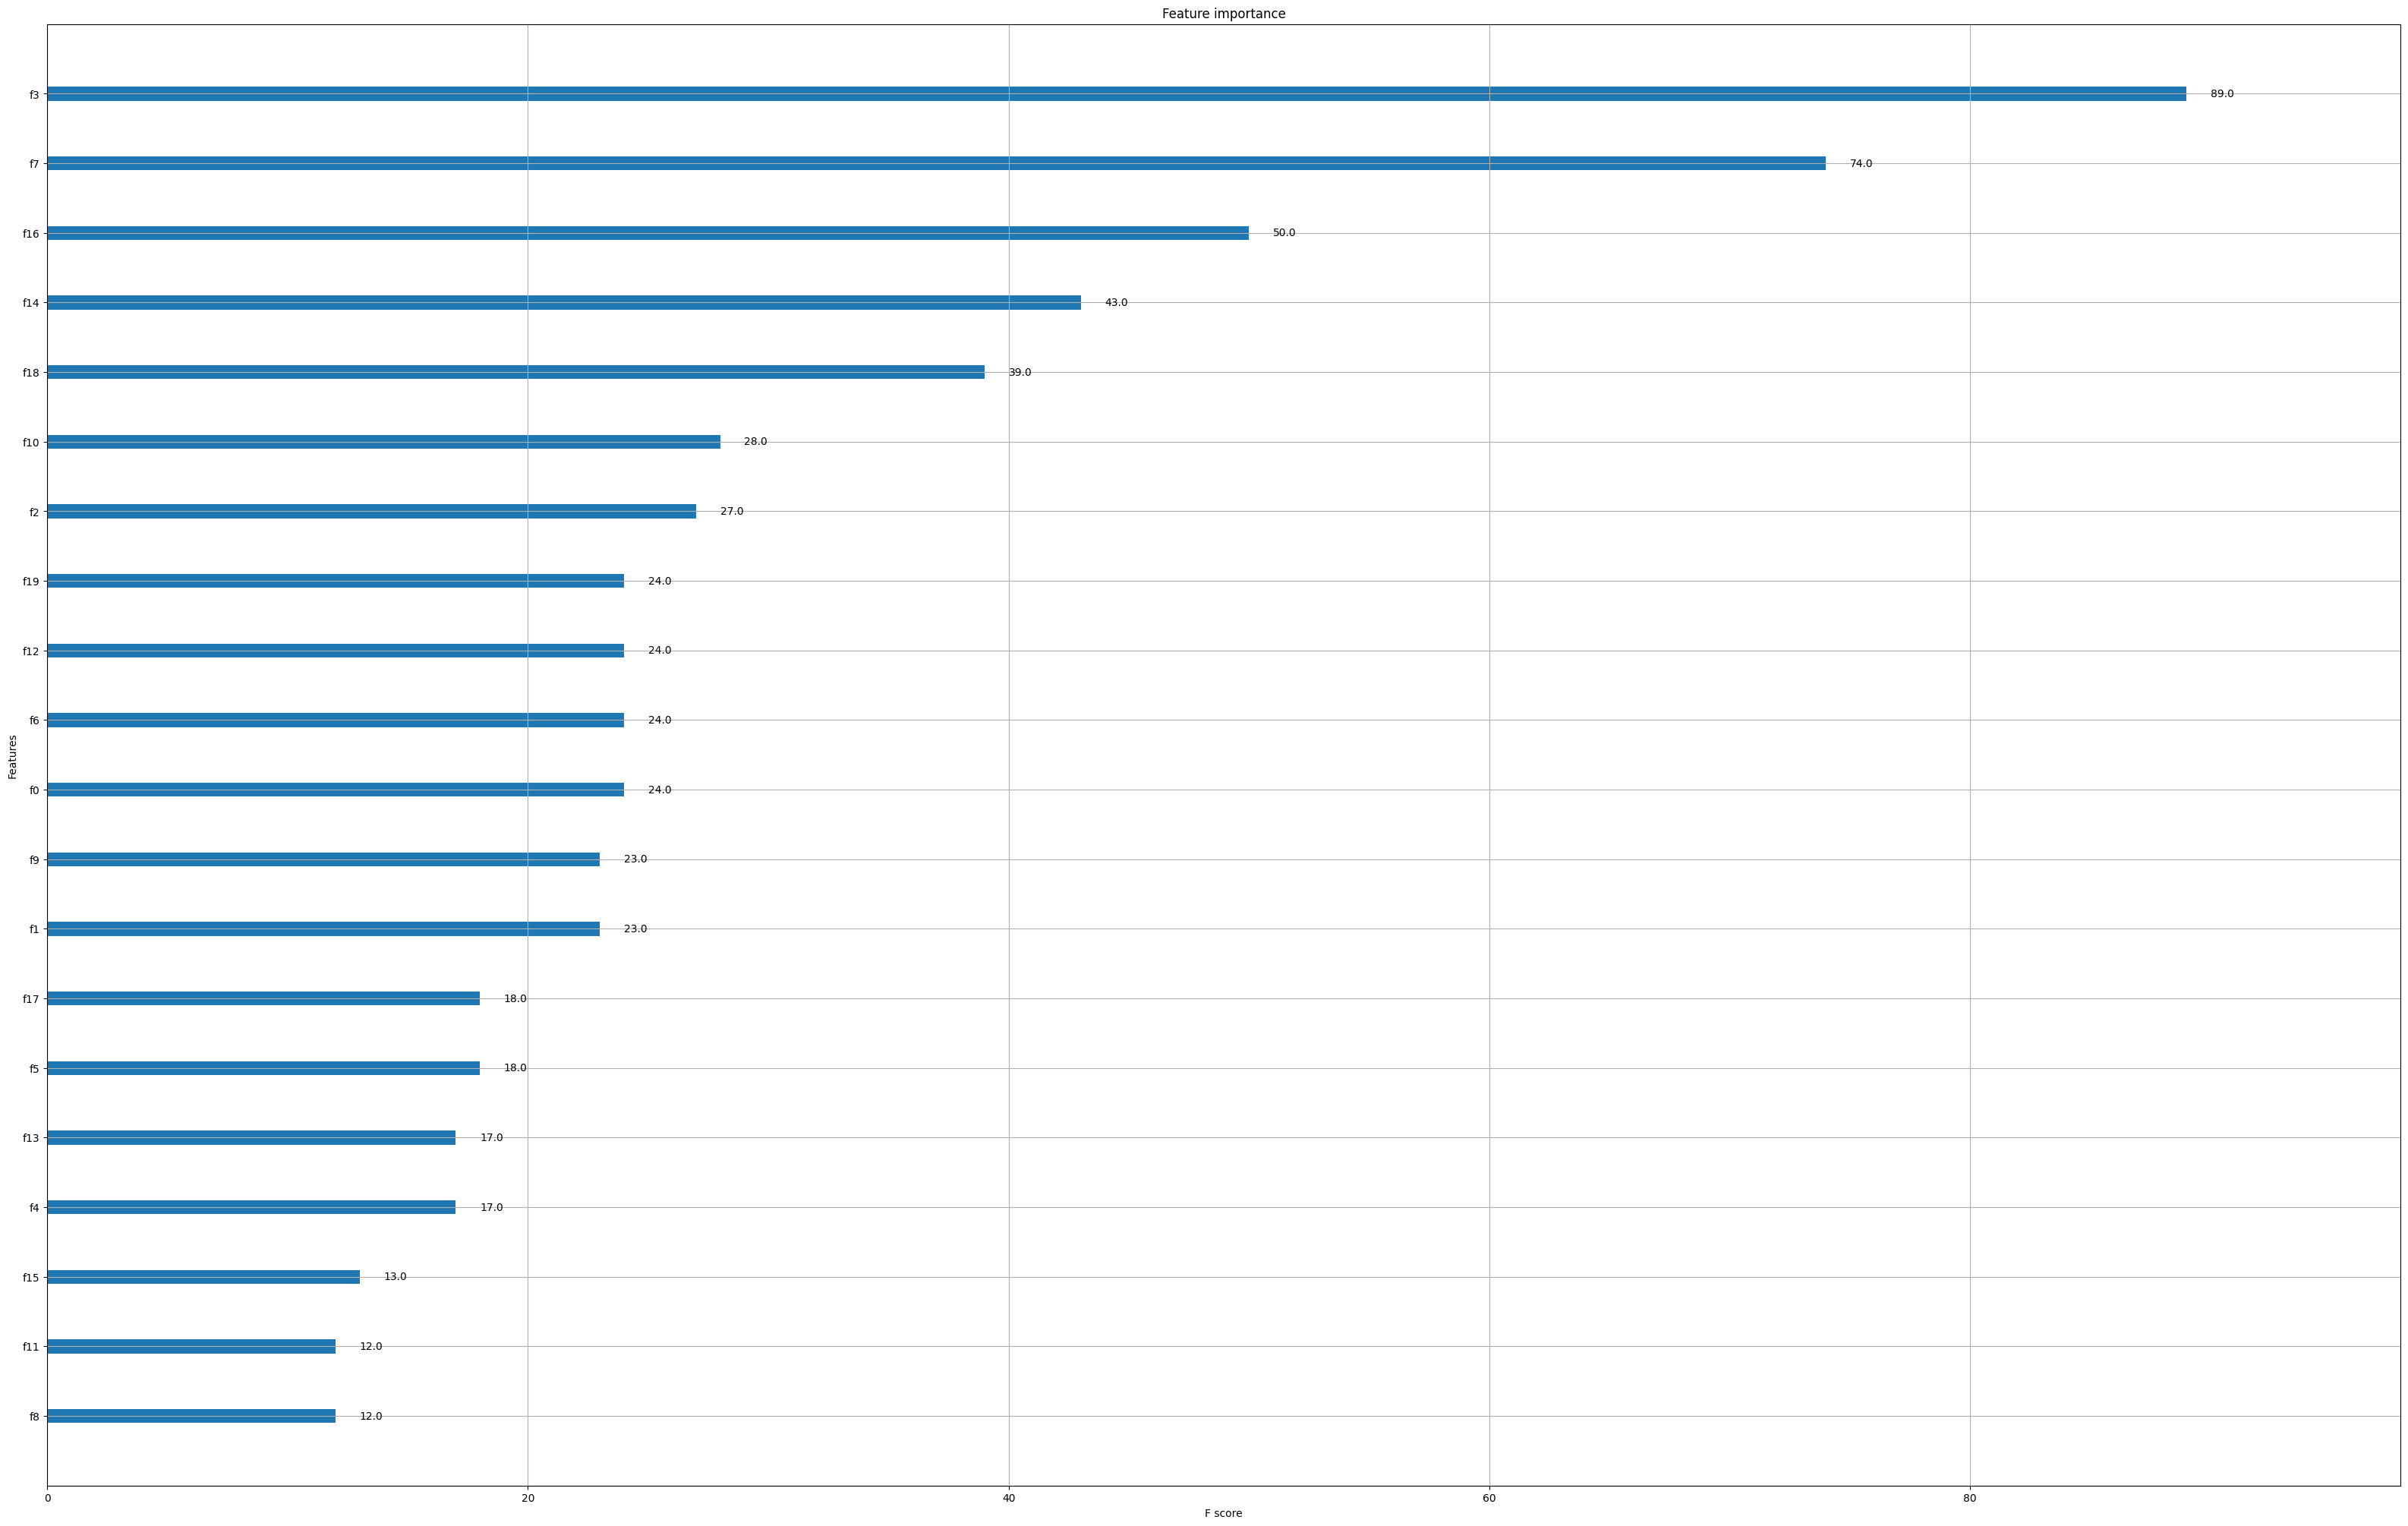

In [ ]:
from matplotlib.pylab import rcParams
##set up the parameters
rcParams['figure.figsize'] = 40,25

xgb.plot_importance(xgb_cl)

### Zadanie 2

Wytrenuj klasyfikator xgboost i porównaj go z Random Forest (na tych samych parametrach).